In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models,losses,datasets


In [4]:
(X_train,y_train),(X_test,y_test) = datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [7]:
X_train = tf.pad(X_train,[[0,0],[2,2],[2,2]])/255
X_test = tf.pad(X_test,[[0,0],[2,2],[2,2]])/255

In [8]:
X_train.shape

TensorShape([60000, 32, 32])

In [9]:
X_train = tf.expand_dims(X_train,axis = 3,name=None)
X_test = tf.expand_dims(X_test,axis = 3,name=None)

In [10]:
X_train.shape

TensorShape([60000, 32, 32, 1])

In [11]:
X_val = X_train[-2000:,:,:,:]
y_val = y_train[-2000:]

X_train = X_train[:-2000,:,:,:]
y_train = y_train[:-2000]

# Training the model

In [24]:
model = models.Sequential()

model.add(layers.Conv2D(6,5,activation="tanh",input_shape= X_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))

model.add(layers.Conv2D(16,5,activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))


model.add(layers.Conv2D(120, kernel_size=5, activation='tanh'))
model.add(layers.Flatten())


model.add(layers.Flatten())
model.add(layers.Dense(84,activation='tanh'))
model.add(layers.Dense(10,activation='softmax'))





/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer = 'adam',loss = losses.sparse_categorical_crossentropy,metrics = ['accuracy'])
history = model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.2063 - loss: 2.1046 - val_accuracy: 0.8990 - val_loss: 0.3853
Epoch 2/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.8455 - loss: 0.4899 - val_accuracy: 0.9380 - val_loss: 0.2324
Epoch 3/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.8835 - loss: 0.3593 - val_accuracy: 0.9230 - val_loss: 0.2462
Epoch 4/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.9067 - loss: 0.2956 - val_accuracy: 0.9445 - val_loss: 0.1931
Epoch 5/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9192 - loss: 0.2527 - val_accuracy: 0.9505 - val_loss: 0.1614
Epoch 6/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.9257 - loss: 0.2326 - val_accuracy: 0.9600 - val_loss: 0.1376
Epoch 7/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.9321 - loss: 0.2176 - val_accuracy: 0.9225 - val_loss: 0.2339
Epoch 8/10
907/907 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.9371 - loss: 0.1973 - 

In [27]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [28]:
y_pred = y_prob.argmax(axis=1)


In [29]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

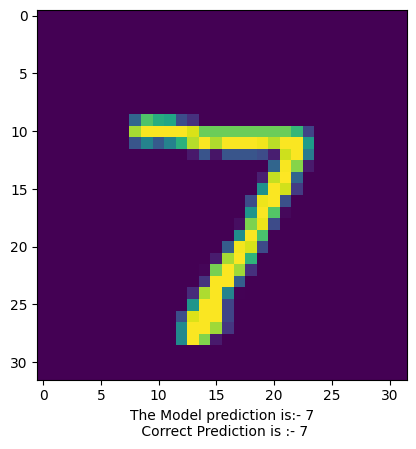

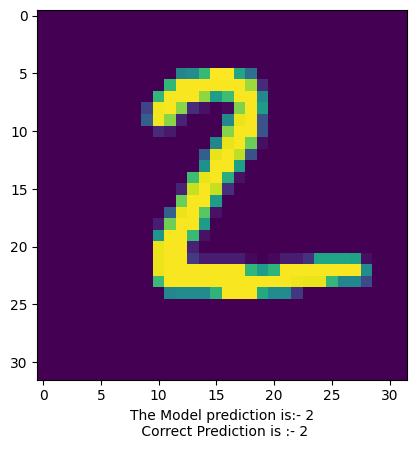

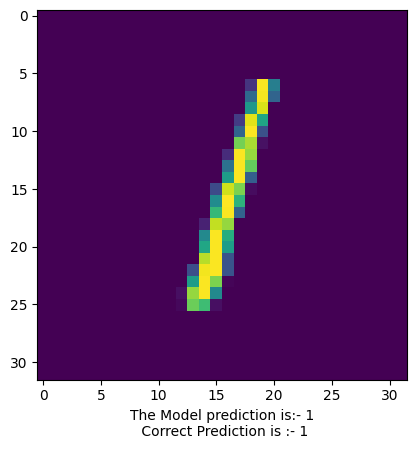

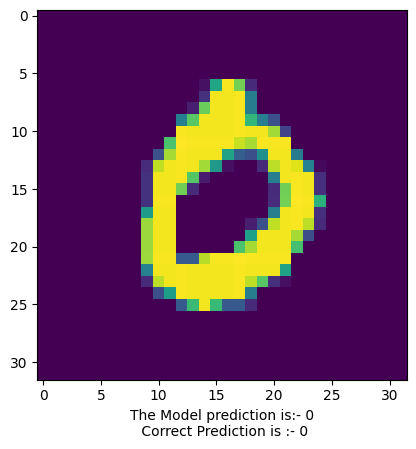

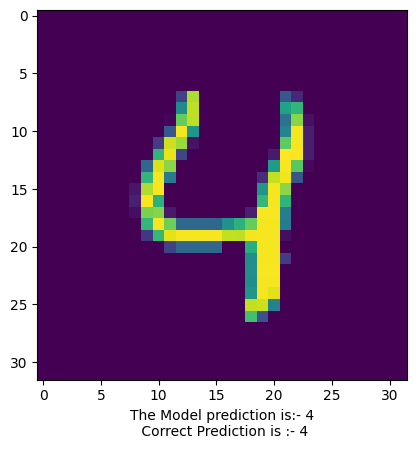

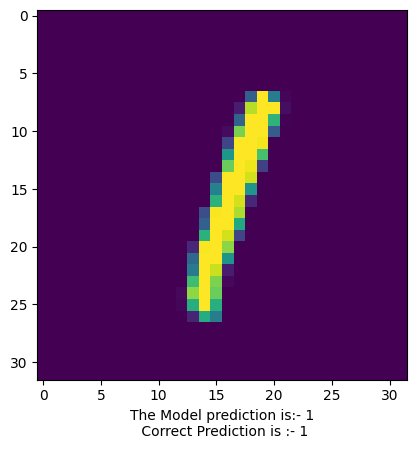

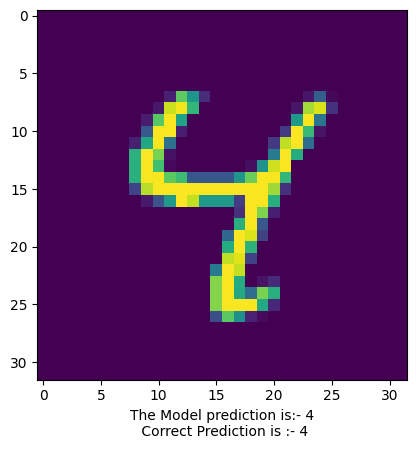

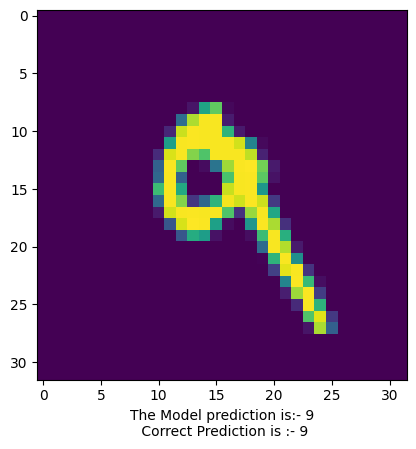

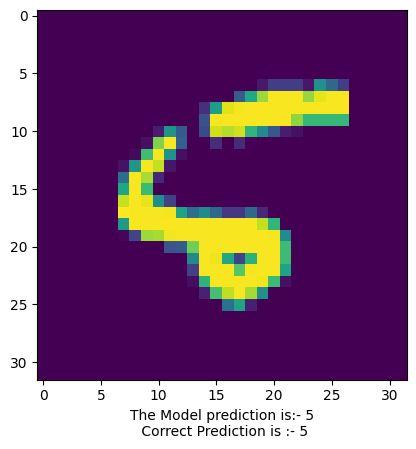

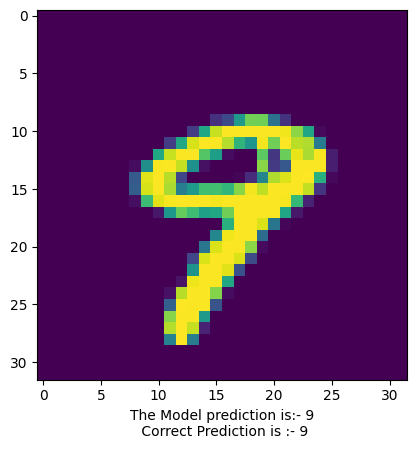

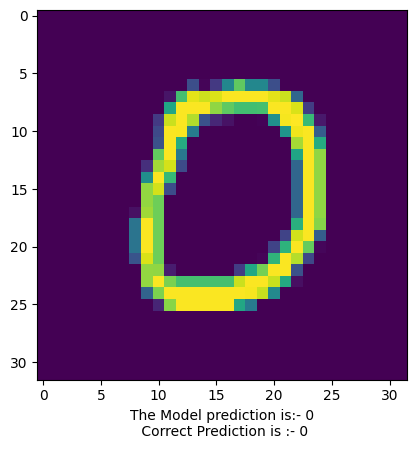

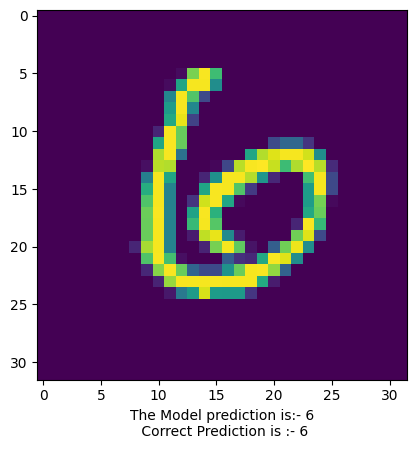

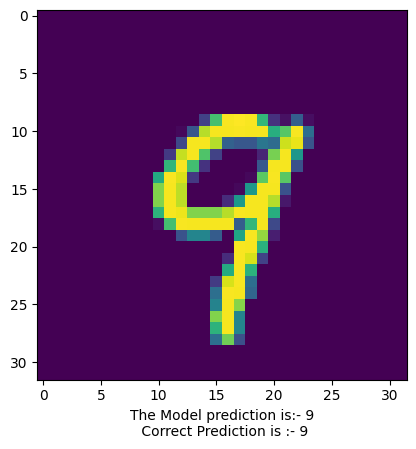

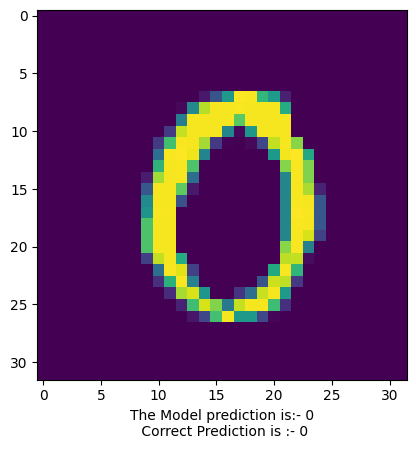

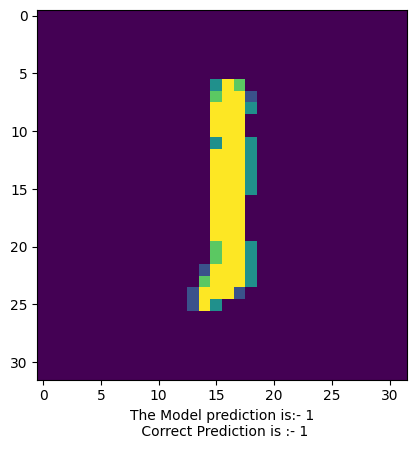

In [30]:
for i in range(15):
  plt.imshow(X_test[i])
  plt.xlabel(f"The Model prediction is:- {y_pred[i]}\n Correct Prediction is :- {y_test[i]}")
  plt.show()

In [ ]:

plt.plot()

In [33]:
history = history.history


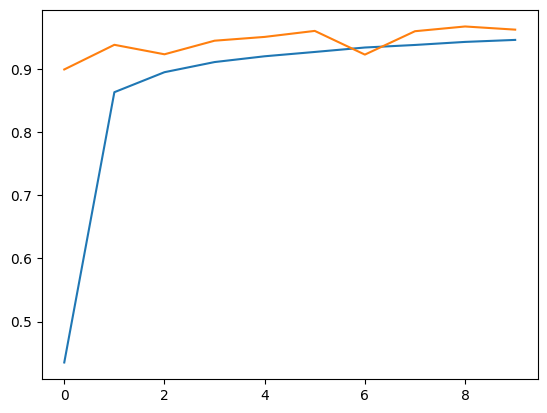

In [34]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])